I was trying the A->B->C parameter estimation [example](https://github.com/rawlings-group/paresto/blob/master/examples/green_book/ABC.m) from Rawlings [reactor design book](https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/) in Julia. 

In [1]:
using CSV
using DataFrames
using JuMP
import Ipopt
using Plots

In [2]:
df = DataFrame(CSV.File("../learn_kipet/my_data_sets/ABC_data.csv"))


,t,ca,cb,cc
,Float64,Float64,Float64,Float64
1,0.0,0.957,-0.031,-0.015
2,0.263,0.557,0.33,0.044
3,0.526,0.342,0.512,0.156
4,0.789,0.224,0.499,0.31
5,1.053,0.123,0.428,0.454
6,1.316,0.079,0.396,0.556
7,1.579,0.035,0.303,0.651
8,1.842,0.029,0.287,0.658
9,2.105,0.025,0.221,0.75


In [3]:
tlist = collect(range(0.0, 5.0, length = 20))

20-element Vector{Float64}:
 0.0
 0.2631578947368421
 0.5263157894736842
 0.7894736842105263
 1.0526315789473684
 1.3157894736842106
 1.5789473684210527
 1.8421052631578947
 2.1052631578947367
 2.3684210526315788
 2.6315789473684212
 2.8947368421052633
 3.1578947368421053
 3.4210526315789473
 3.6842105263157894
 3.9473684210526314
 4.2105263157894735
 4.473684210526316
 4.7368421052631575
 5.0

In [4]:
tlist = unique(sort(vcat(tlist, df.t)))

38-element Vector{Float64}:
 0.0
 0.263
 0.2631578947368421
 0.526
 0.5263157894736842
 0.789
 0.7894736842105263
 1.0526315789473684
 1.053
 1.3157894736842106
 1.316
 1.5789473684210527
 1.579
 ⋮
 3.4210526315789473
 3.684
 3.6842105263157894
 3.947
 3.9473684210526314
 4.2105263157894735
 4.211
 4.473684210526316
 4.474
 4.7368421052631575
 4.737
 5.0

In [38]:
pest = Model(Ipopt.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [39]:
n = length(tlist)

38

In [40]:
@variable(pest, ca[1:n] >= 0.0)

38-element Vector{VariableRef}:
 ca[1]
 ca[2]
 ca[3]
 ca[4]
 ca[5]
 ca[6]
 ca[7]
 ca[8]
 ca[9]
 ca[10]
 ca[11]
 ca[12]
 ca[13]
 ⋮
 ca[27]
 ca[28]
 ca[29]
 ca[30]
 ca[31]
 ca[32]
 ca[33]
 ca[34]
 ca[35]
 ca[36]
 ca[37]
 ca[38]

In [41]:
@variable(pest, cb[1:n] >= 0.0)

38-element Vector{VariableRef}:
 cb[1]
 cb[2]
 cb[3]
 cb[4]
 cb[5]
 cb[6]
 cb[7]
 cb[8]
 cb[9]
 cb[10]
 cb[11]
 cb[12]
 cb[13]
 ⋮
 cb[27]
 cb[28]
 cb[29]
 cb[30]
 cb[31]
 cb[32]
 cb[33]
 cb[34]
 cb[35]
 cb[36]
 cb[37]
 cb[38]

In [42]:
@variable(pest, cc[1:n] >= 0.0)

38-element Vector{VariableRef}:
 cc[1]
 cc[2]
 cc[3]
 cc[4]
 cc[5]
 cc[6]
 cc[7]
 cc[8]
 cc[9]
 cc[10]
 cc[11]
 cc[12]
 cc[13]
 ⋮
 cc[27]
 cc[28]
 cc[29]
 cc[30]
 cc[31]
 cc[32]
 cc[33]
 cc[34]
 cc[35]
 cc[36]
 cc[37]
 cc[38]

In [43]:
@variable(pest, 0.01 <= k1 <= 10.0, start = 1.0)
@variable(pest, 0.01 <= k2 <= 10.0, start = 1.0)

k2

In [44]:
set_lower_bound(ca[1], 0.9)
set_upper_bound(ca[1], 1.0)

In [45]:
set_upper_bound(cb[1], 0.1)
set_upper_bound(cc[1], 0.1)

In [46]:
@NLconstraint(pest,
     [i=1:(n-1)],
      ca[i+1] - ca[i] == (tlist[i+1] - tlist[i]) * (-k1*ca[i+1])
)


37-element Vector{NonlinearConstraintRef{ScalarShape}}:
 (ca[2] - ca[1]) - (0.263 - 0.0) * (-k1 * ca[2]) = 0
 (ca[3] - ca[2]) - (0.2631578947368421 - 0.263) * (-k1 * ca[3]) = 0
 (ca[4] - ca[3]) - (0.526 - 0.2631578947368421) * (-k1 * ca[4]) = 0
 (ca[5] - ca[4]) - (0.5263157894736842 - 0.526) * (-k1 * ca[5]) = 0
 (ca[6] - ca[5]) - (0.789 - 0.5263157894736842) * (-k1 * ca[6]) = 0
 (ca[7] - ca[6]) - (0.7894736842105263 - 0.789) * (-k1 * ca[7]) = 0
 (ca[8] - ca[7]) - (1.0526315789473684 - 0.7894736842105263) * (-k1 * ca[8]) = 0
 (ca[9] - ca[8]) - (1.053 - 1.0526315789473684) * (-k1 * ca[9]) = 0
 (ca[10] - ca[9]) - (1.3157894736842106 - 1.053) * (-k1 * ca[10]) = 0
 (ca[11] - ca[10]) - (1.316 - 1.3157894736842106) * (-k1 * ca[11]) = 0
 (ca[12] - ca[11]) - (1.5789473684210527 - 1.316) * (-k1 * ca[12]) = 0
 (ca[13] - ca[12]) - (1.579 - 1.5789473684210527) * (-k1 * ca[13]) = 0
 (ca[14] - ca[13]) - (1.842 - 1.579) * (-k1 * ca[14]) = 0
 ⋮
 (ca[27] - ca[26]) - (3.4210526315789473 - 3.421) * (-k1 *

In [47]:
@NLconstraint(pest,
     [i=1:(n-1)],
      cb[i+1] - cb[i] == (tlist[i+1] - tlist[i]) * (k1*ca[i+1]-k2*cb[i+1])
)

37-element Vector{NonlinearConstraintRef{ScalarShape}}:
 (cb[2] - cb[1]) - (0.263 - 0.0) * (k1 * ca[2] - k2 * cb[2]) = 0
 (cb[3] - cb[2]) - (0.2631578947368421 - 0.263) * (k1 * ca[3] - k2 * cb[3]) = 0
 (cb[4] - cb[3]) - (0.526 - 0.2631578947368421) * (k1 * ca[4] - k2 * cb[4]) = 0
 (cb[5] - cb[4]) - (0.5263157894736842 - 0.526) * (k1 * ca[5] - k2 * cb[5]) = 0
 (cb[6] - cb[5]) - (0.789 - 0.5263157894736842) * (k1 * ca[6] - k2 * cb[6]) = 0
 (cb[7] - cb[6]) - (0.7894736842105263 - 0.789) * (k1 * ca[7] - k2 * cb[7]) = 0
 (cb[8] - cb[7]) - (1.0526315789473684 - 0.7894736842105263) * (k1 * ca[8] - k2 * cb[8]) = 0
 (cb[9] - cb[8]) - (1.053 - 1.0526315789473684) * (k1 * ca[9] - k2 * cb[9]) = 0
 (cb[10] - cb[9]) - (1.3157894736842106 - 1.053) * (k1 * ca[10] - k2 * cb[10]) = 0
 (cb[11] - cb[10]) - (1.316 - 1.3157894736842106) * (k1 * ca[11] - k2 * cb[11]) = 0
 (cb[12] - cb[11]) - (1.5789473684210527 - 1.316) * (k1 * ca[12] - k2 * cb[12]) = 0
 (cb[13] - cb[12]) - (1.579 - 1.5789473684210527) * (k1

In [48]:
@NLconstraint(pest,
     [i=1:(n-1)],
      cc[i+1] - cc[i] == (tlist[i+1] - tlist[i]) * (k2*cb[i+1])
)

37-element Vector{NonlinearConstraintRef{ScalarShape}}:
 (cc[2] - cc[1]) - (0.263 - 0.0) * (k2 * cb[2]) = 0
 (cc[3] - cc[2]) - (0.2631578947368421 - 0.263) * (k2 * cb[3]) = 0
 (cc[4] - cc[3]) - (0.526 - 0.2631578947368421) * (k2 * cb[4]) = 0
 (cc[5] - cc[4]) - (0.5263157894736842 - 0.526) * (k2 * cb[5]) = 0
 (cc[6] - cc[5]) - (0.789 - 0.5263157894736842) * (k2 * cb[6]) = 0
 (cc[7] - cc[6]) - (0.7894736842105263 - 0.789) * (k2 * cb[7]) = 0
 (cc[8] - cc[7]) - (1.0526315789473684 - 0.7894736842105263) * (k2 * cb[8]) = 0
 (cc[9] - cc[8]) - (1.053 - 1.0526315789473684) * (k2 * cb[9]) = 0
 (cc[10] - cc[9]) - (1.3157894736842106 - 1.053) * (k2 * cb[10]) = 0
 (cc[11] - cc[10]) - (1.316 - 1.3157894736842106) * (k2 * cb[11]) = 0
 (cc[12] - cc[11]) - (1.5789473684210527 - 1.316) * (k2 * cb[12]) = 0
 (cc[13] - cc[12]) - (1.579 - 1.5789473684210527) * (k2 * cb[13]) = 0
 (cc[14] - cc[13]) - (1.842 - 1.579) * (k2 * cb[14]) = 0
 ⋮
 (cc[27] - cc[26]) - (3.4210526315789473 - 3.421) * (k2 * cb[27]) = 0
 

In [49]:
iexp = indexin(df.t, tlist)

20-element Vector{Union{Nothing, Int64}}:
  1
  2
  4
  6
  9
 11
 13
 14
 16
 18
 21
 23
 25
 26
 28
 30
 33
 35
 37
 38

In [50]:
@NLobjective(pest, Min, 
  sum((ca[ie] - df.ca[i])^2+(cb[ie] - df.cb[i])^2+(cc[ie]-df.cc[i])^2 for (i, ie) in enumerate(iexp))
)

In [51]:
optimize!(pest)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      444
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      504

Total number of variables............................:      116
                     variables with only lower bounds:      111
                variables with lower and upper bounds:        5
                     variables with only upper bounds:        0
Total number of equality constraints.................:      111
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [52]:
solution_summary(pest)

* Solver : Ipopt

* Status
  Termination status : LOCALLY_SOLVED
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution
  Objective value      : 0.03064695924737734

* Work counters
  Solve time (sec)   : 0.07321


In [53]:
value(k1), value(k2)

(2.7256732987169556, 0.9877370841922472)

In [54]:
ca_pred = [value(ca[i]) for i in 1:n]
cb_pred = [value(cb[i]) for i in 1:n]
cc_pred = [value(cc[i]) for i in 1:n]


38-element Vector{Float64}:
 7.2220209046280955e-9
 0.08731750530396548
 0.08736995796476303
 0.20653437534842953
 0.20667759033166808
 0.3302573498042856
 0.3304802087980067
 0.44566268058212277
 0.4458239190958466
 0.546953263671016
 0.5470342716596486
 0.6330763540670878
 0.6330935756548691
 ⋮
 0.9258353769608357
 0.9416588813900261
 0.9416715477557925
 0.9542680580692279
 0.9542857115919618
 0.9643195578410441
 0.9643376104224268
 0.972301232039619
 0.9723108026598029
 0.9786435596775946
 0.9786473633075969
 0.983681549924625

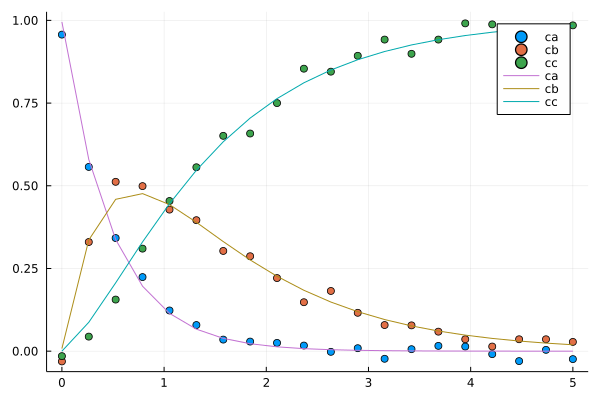

In [57]:
plot(df.t, [df.ca, df.cb, df.cc], label = ["ca" "cb" "cc"], seriestype = :scatter)
plot!(tlist, [ca_pred, cb_pred, cc_pred], label = ["ca" "cb" "cc"])